In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
#seaborn.set_palette

In [3]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """returns DataFrame with count and percentage of NaN values.
        Only returns columns with Nan > 0.
        .
        Input:
            df: DataFrame
        Output:
            nan_df: DataFrame containing count and percentage of NaN values of input DataFrame
    """
    count = df.isnull().sum()
    n = df.shape[0]
    nan_percentage = count / n*100
    nan_df = pd.concat([count,nan_percentage],axis = 1, keys=['Count', '% of null'])
    #return nan_df[nan_df['Count'] > 0]
    return nan_df

def filter_columns(df: pd.DataFrame, excl_dtypes: list, excl_columns: list) -> list:
    """Returns list of columns without pre-specified datatypes and column names
        Inputs:
            df: pandas dataframe
            excl_dtypes:  list of excluded datatypes
            excl_columns: list of excluded columns
        Outputs:
            arr: python list of strings (column names)
    """
    return [col for col in df.columns if df[col].dtype not in excl_dtypes and col not in excl_columns]

def get_unique_values(arr: list, df: pd.DataFrame) -> dict:
    """Returns list of unique values for each column in input list
        Inputs:
            arr: list of columns
            df: dataframe
        Outputs:
            dict: dictionary of column_name:unique_values
    """
    
    d = {}
    for col in arr:
        d[col] =  df[col].nunique(),df[col].unique().tolist()
    return d   

In [4]:
def annotate_countplot(df: pd.DataFrame, ax: plt.axes,fnt_size=10, xtext_offset=0):
    """Annotates barplot with count and percentages
        Inputs:
            ax: reference to pyplot axes object
            fnt_size: size of annotation font
            xtext_offset: shift xtext
    """
    total = len(df)
    sizes = [0]
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > max(sizes):
            sizes.append(height)
        x, y = p.get_xy()
        count, perc = height, height/len(df)*100
        #ax.annotate('{}  ({:.1%})'.format(count, perc), xy=(x+0.2, y + height ),xytext=(x+xtext_offset, height*1.01),fontsize=fnt_size)
        ax.text(x + width/2.,
                height + 3,
                '{} {} ({:1.2f}%)'.format(count,'\n', perc),
                ha="center", fontsize=fnt_size) 
    ax.set_ylim(0, max(sizes) * 1.15)

In [5]:
%%time

train = pd.read_csv('../../data/raw/application_train.csv')
test = pd.read_csv('../../data/raw/application_test.csv')

print(f'Train has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'Test has {test.shape[0]} rows and {test.shape[1]} columns')

Train has 307511 rows and 122 columns
Test has 48744 rows and 121 columns
CPU times: user 2.53 s, sys: 304 ms, total: 2.83 s
Wall time: 3.28 s


In [6]:
#Lets set columns display to number of columns, so we can scroll easily(rows too, just in case we wanted to transpose dataframe)
pd.set_option('display.max_columns', train.shape[1])
pd.set_option('display.max_rows', train.shape[1])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
%%time
train_cols = pd.DataFrame(train.dtypes).drop(labels='TARGET').rename(columns={0:'Train'})
test_cols = pd.DataFrame(test.dtypes).rename(columns={0:'Test'})
frames = [train_cols,test_cols]
conc = pd.concat(frames,axis= 1)
conc['is_same'] = (conc.Train==conc.Test)
conc.T

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 12.4 ms


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Train,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
Test,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
is_same,True,True,True,True,True,True,True,True,Tr

In [9]:
misssing_train = missing_values(train).drop(labels='TARGET').sort_index(axis=0).rename(columns={'Count':'Train count','% of null':'Train %',})
misssing_test = missing_values(test).sort_index(axis=0).rename(columns={'Count':'Test count','% of null':'Test %',})
missing_all = pd.concat([misssing_train,misssing_test],axis=1)
missing_all['diff'] = np.abs(missing_all['Train %'] - missing_all['Test %'])
missing_all[(missing_all['Train count'] > 0) | missing_all['Test count'] > 0].sort_values(by='diff',ascending=False)

,Train count,Train %,Test count,Test %,diff
EXT_SOURCE_1,173378,56.381073,20532,42.122107,14.258965
EXT_SOURCE_3,60965,19.825307,8668,17.782701,2.042606
ENTRANCES_MODE,154828,50.348768,23579,48.373133,1.975635
ENTRANCES_MEDI,154828,50.348768,23579,48.373133,1.975635
ENTRANCES_AVG,154828,50.348768,23579,48.373133,1.975635
FLOORSMAX_MODE,153020,49.760822,23321,47.843837,1.916984
FLOORSMAX_MEDI,153020,49.760822,23321,47.843837,1.916984
FLOORSMAX_AVG,153020,49.760822,23321,47.843837,1.916984
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019,22856,46.889874,1.891146
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019,22856,46.889874,1.891146


In [11]:
dtypes_filter = ['float64','int64']
columns_filter = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']
filtered_cols = filter_columns(train, dtypes_filter, columns_filter)
unique_vals = get_unique_values(filtered_cols, train)
for col, val in unique_vals.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*150)

Column NAME_CONTRACT_TYPE has 2 distinct values.
['Cash loans', 'Revolving loans']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column CODE_GENDER has 3 distinct values.
['M', 'F', 'XNA']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column FLAG_OWN_CAR has 2 distinct values.
['N', 'Y']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column FLAG_OWN_REALTY has 2 distinct values.
['Y', 'N']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column NAME_TYPE_SUITE has 7 distinct values.
['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of 

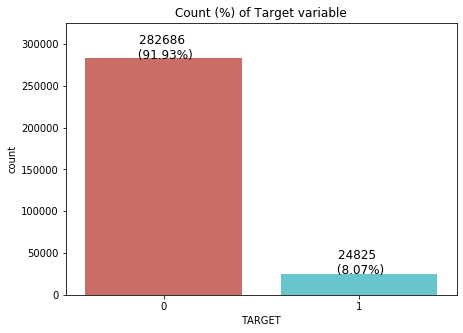

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='TARGET', data=train,palette='hls')
ax.set_title('Count (%) of Target variable')
annotate_countplot(train,ax,12)
plt.show()

In [19]:
%%time
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.drop(['SK_ID_CURR', 'TARGET'],axis=1).describe()

CPU times: user 1.3 s, sys: 128 ms, total: 1.43 s
Wall time: 1.44 s


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,104582.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307509.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,134133.000,306851.000,246546.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,159080.000,306490.000,306490.000,306490.000,306490.000,307510.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,0.658,0.340,0.694,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.061,1.000,0.820,0.199,0.998,0.281,0.057,2.153,2.052,2.032,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.502,0.514,0.511,0.117,0.088,0.978,0.752,0.045,0.079,0.150,0.226,0.232,0.066,0.101,0.107,0.009,0.028,0.114,0.088,0.977,0.760,0.043,0.074,0.145,0.222,0.228,0.065,0.106,0.106,0.008,0.027,0.118,0.088,0.978,0.756,0.045,0.078,0.149,0.226,0.232,0.067,0.102,0.109,0.009,0.028,0.103,1.422,0.143,1.405,0.100,-962.859,0.000,0.710,0.000,0.015,0.088,0.000,0.081,0.004,0.000,0.004,0.000,0.004,0.003,0.001,0.010,0.000,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,0.474,0.474,0.461,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,11.945,0.002,0.384,0.400,0.043,0.450,0.231,0.911,0.509,0.503,3.266,0.122,0.220,0.197,

In [20]:
%%time
test.drop(['SK_ID_CURR'],axis=1).describe()

CPU times: user 363 ms, sys: 11.3 ms, total: 375 ms
Wall time: 373 ms


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000,48744.000,48744.000,48720.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,16432.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,28212.000,48736.000,40076.000,24857.000,21103.000,25888.000,16926.000,15249.000,23555.000,25165.000,25423.000,16278.000,20490.000,15964.000,25192.000,15397.000,22660.000,24857.000,21103.000,25888.000,16926.000,15249.000,23555.000,25165.000,25423.000,16278.000,20490.000,15964.000,25192.000,15397.000,22660.000,24857.000,21103.000,25888.000,16926.000,15249.000,23555.000,25165.000,25423.000,16278.000,20490.000,15964.000,25192.000,15397.000,22660.000,26120.000,48715.000,48715.000,48715.000,48715.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,48744.000,42695.000,42695.000,42695.000,42695.000,42695.000,42695.000
mean,0.397,178431.806,516740.436,29426.240,462618.840,0.021,-16068.085,67485.366,-4967.653,-3051.713,11.786,1.000,0.810,0.205,0.998,0.263,0.163,2.147,2.038,2.013,12.007,0.019,0.055,0.042,0.077,0.225,0.174,0.501,0.518,0.500,0.122,0.090,0.979,0.751,0.048,0.085,0.152,0.234,0.238,0.067,0.106,0.112,0.009,0.029,0.119,0.089,0.978,0.758,0.045,0.081,0.147,0.229,0.234,0.066,0.111,0.111,0.008,0.028,0.123,0.090,0.979,0.754,0.047,0.084,0.151,0.233,0.238,0.068,0.107,0.113,0.009,0.029,0.107,1.448,0.144,1.436,0.101,-1077.766,0.000,0.787,0.000,0.015,0.087,0.000,0.088,0.004,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.002,0.002,0.003,0.009,0.547,1.984
std,0.709,101522.592,365397.004,16016.368,336710.215,0.014,4325.900,144348.507,3552.612,1569.277,11.463,0.005,0.393,0.403,0.040,0.440,0.369,0.890,0.523,0.516,3.278,0.136,0.228,0.201,0.267,0.417,0.379,0.205,0.181,0.189,0.113,0.082,0.049,0.113,0.083,0.139,0.101,0.147,0.165,0.082,0.098,0.115,0.049,0.072,0.113,0.083,0.054,0.110,0.081,0.138,0.102,0.146,0.165,0.083,0.104,0.117,0.047,0.0

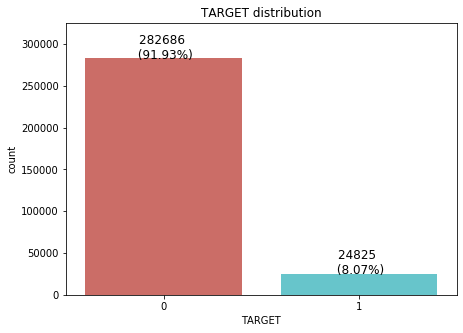

In [21]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='TARGET', data=train, palette='hls')
ax.set_title('TARGET distribution')
annotate_countplot(train,ax,12)
plt.show()

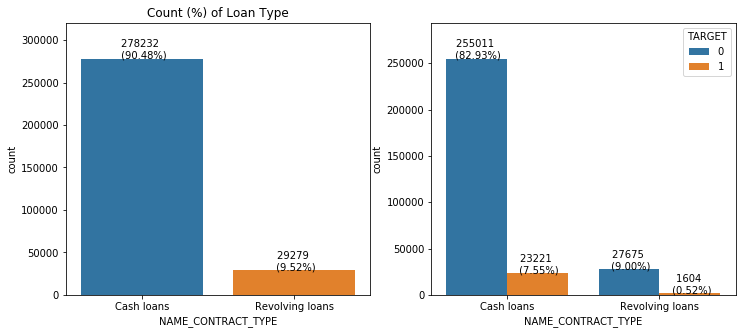

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax1 = sns.countplot(x='NAME_CONTRACT_TYPE', data=train,ax=ax[0])
ax2 = sns.countplot(x='NAME_CONTRACT_TYPE', data=train,hue='TARGET',ax=ax[1])
ax1.set_title('Count (%) of Loan Type')
annotate_countplot(train,ax1,10)
annotate_countplot(train,ax2,10)

# Binary Features

In [14]:
train['CODE_GENDER'] = 1*(train['CODE_GENDER']=='F')
train['FLAG_OWN_CAR'] = 1*(train['FLAG_OWN_CAR']=='Y')
train['FLAG_OWN_REALTY'] = 1*(train['FLAG_OWN_REALTY']=='Y')

In [15]:
train['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

No     159428
NaN    145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [84]:
_filter = ['object','float64']
columns_filter = ['SK_ID_CURR','TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'CNT_CHILDREN',
                 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT_W_CITY']
binary_cols = filter_columns(train, _filter, columns_filter)
binary = get_unique_values(binary_cols, train)
for col, val in binary.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*150)
    print()

Column CODE_GENDER has 2 distinct values.
[0, 1]
------------------------------------------------------------------------------------------------------------------------------------------------------

Column FLAG_OWN_CAR has 2 distinct values.
[0, 1]
------------------------------------------------------------------------------------------------------------------------------------------------------

Column FLAG_OWN_REALTY has 2 distinct values.
[1, 0]
------------------------------------------------------------------------------------------------------------------------------------------------------

Column FLAG_MOBIL has 2 distinct values.
[1, 0]
------------------------------------------------------------------------------------------------------------------------------------------------------

Column FLAG_EMP_PHONE has 2 distinct values.
[1, 0]
--------------------------------------------------------------------------------------------------------------------------------------------

In [85]:
len(binary_cols)

35

CPU times: user 1.57 s, sys: 15.3 ms, total: 1.58 s
Wall time: 1.58 s


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


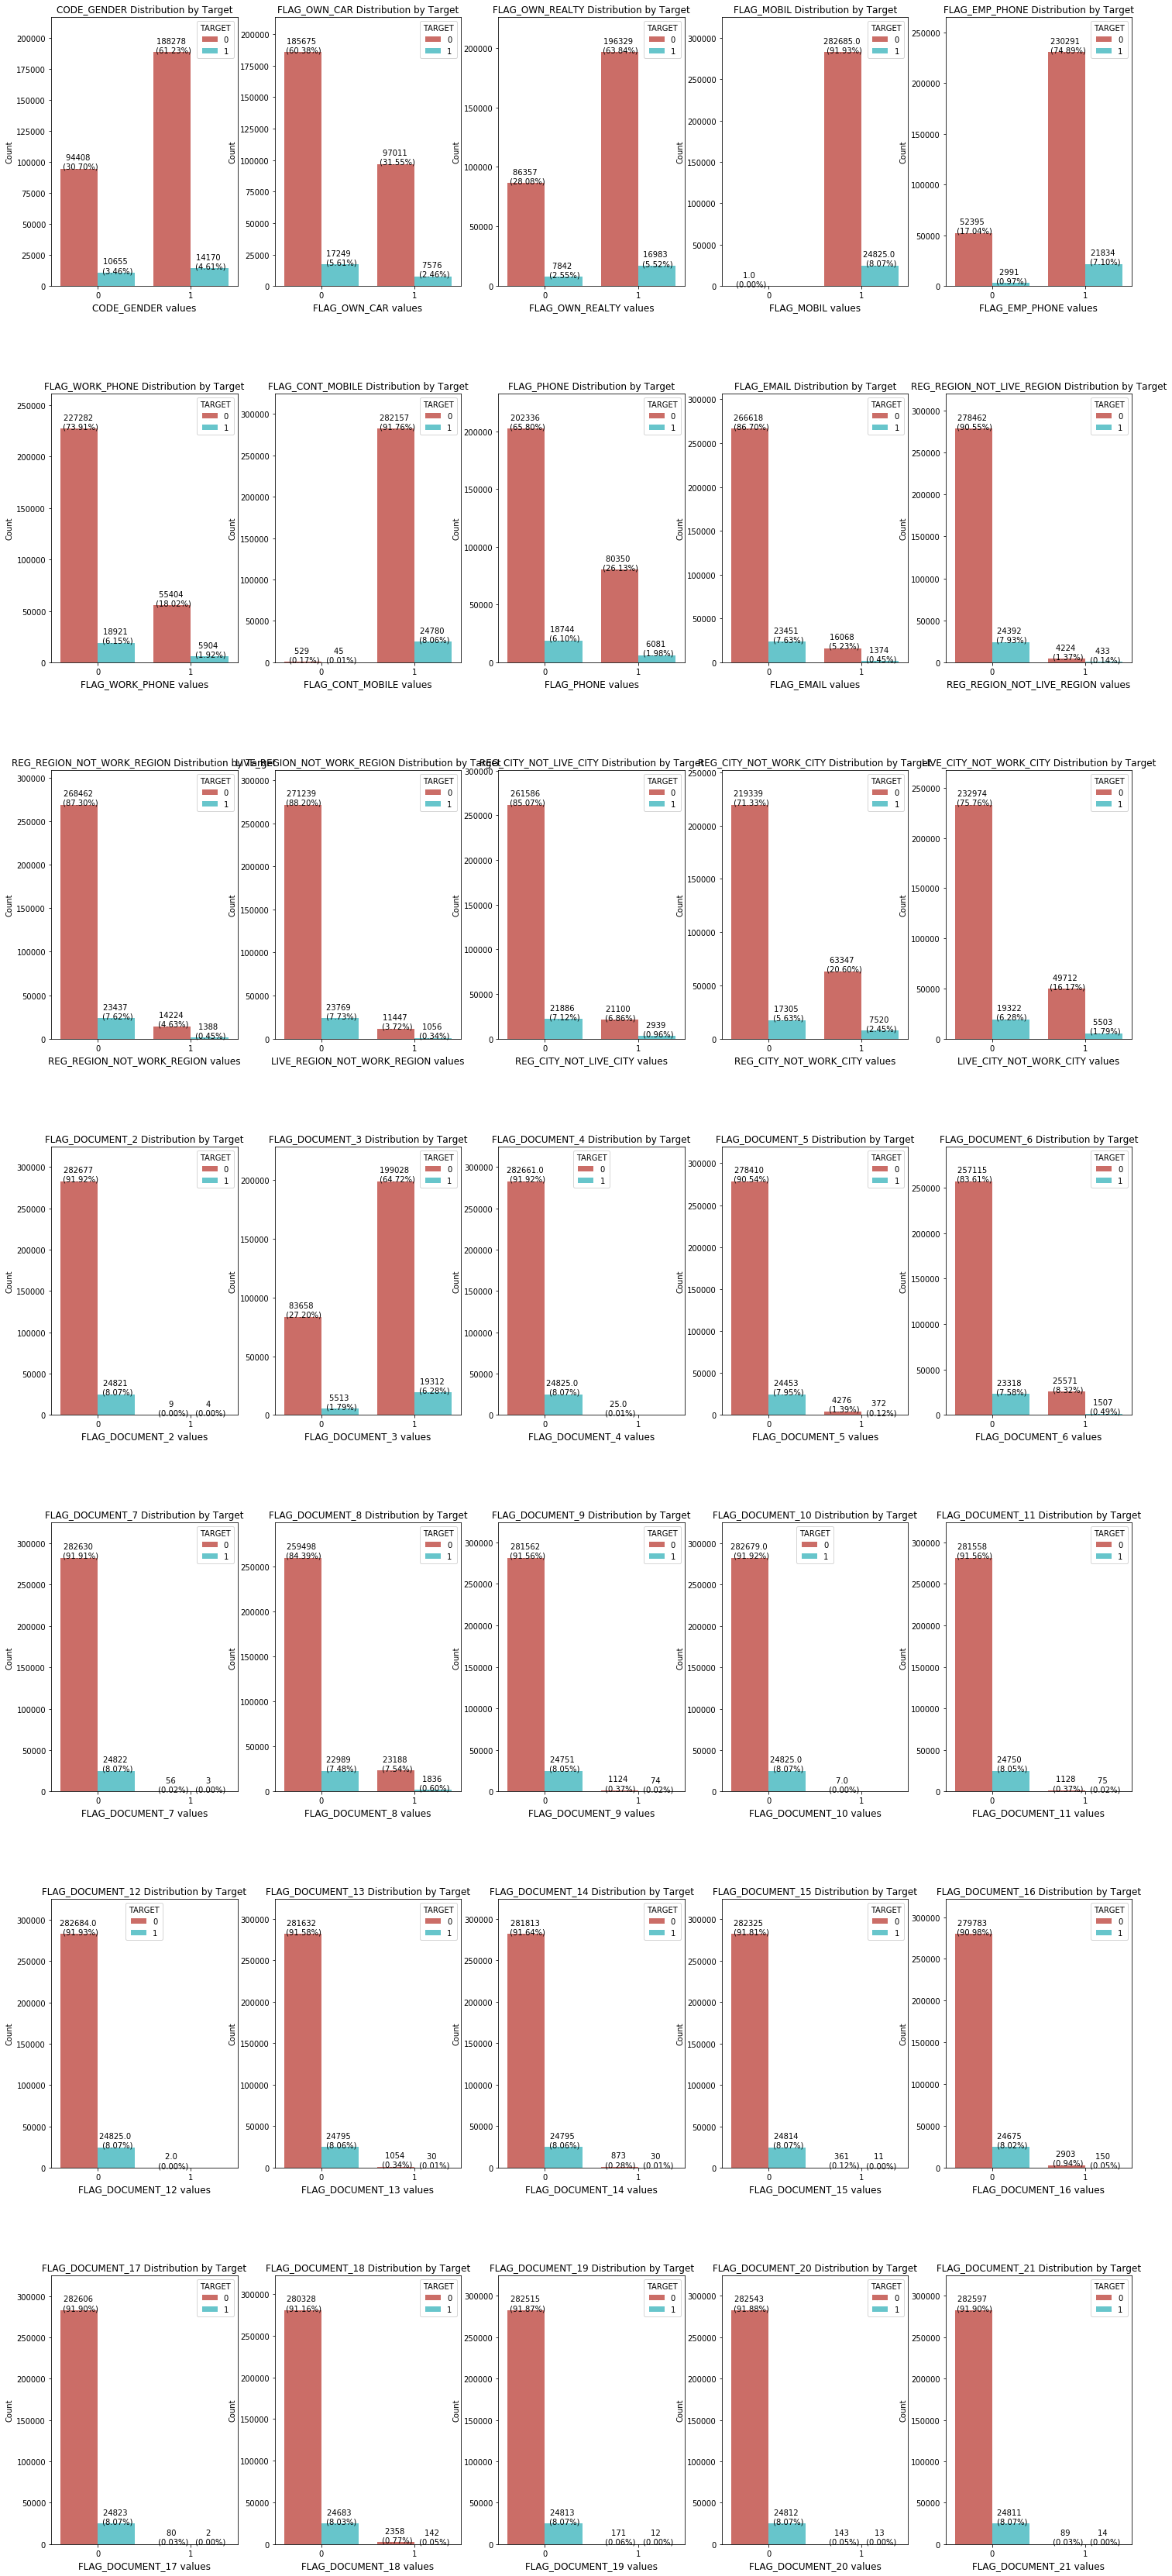

In [86]:
%%time
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(7, 5,hspace=0.4) # The grid of chart
plt.figure(figsize=(25,60)) # size of figure

for n, col in enumerate(train[binary_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='TARGET', palette='hls') 
    ax.set_ylabel('Count', fontsize=10) 
    ax.set_title(f'{col} Distribution by Target', fontsize=12) 
    ax.set_xlabel(f'{col} values', fontsize=12)
    annotate_countplot(train,ax,10)

# Nominal Features

In [43]:
list(bin_removed.keys())

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [89]:
_filter = ['float64']
columns_filter = ['SK_ID_CURR','TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'CNT_CHILDREN',
                 'ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START']
nominal_cols = filter_columns(train, _filter, columns_filter)
nominal = get_unique_values(nominal_cols, train)
#flags_remo = {k: v for k, v in nominal.items() if not k.startswith('FLAG')}
binary_removed = {k: v for k, v in nominal.items() if 2 < v[0] < 9 }
for col, val in binary_removed.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*150)
    print()

Column NAME_TYPE_SUITE has 7 distinct values.
['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people']
------------------------------------------------------------------------------------------------------------------------------------------------------

Column NAME_INCOME_TYPE has 8 distinct values.
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
------------------------------------------------------------------------------------------------------------------------------------------------------

Column NAME_EDUCATION_TYPE has 5 distinct values.
['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
------------------------------------------------------------------------------------------------------------------------------------------------------

Column NAME_FAMILY_STATUS has 6 distinct values.
['Single 

In [91]:
len(binary_removed)

10

In [77]:
def ploting_cat_fet(df, cols, vis_row=6, vis_col=2):
    
    grid = gridspec.GridSpec(vis_row,vis_col,hspace=0.6) # The grid of chart
    fig = plt.figure(figsize=(20, 50)) # size of figure
    fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
    total=len(df)
    angle = 45
    
    # loop to get column and the count of plots
    for n, col in enumerate(df[cols]): 
        tmp = pd.crosstab(df[col], df['TARGET'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=df, order=list(tmp[col].values) , color='green') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=12) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

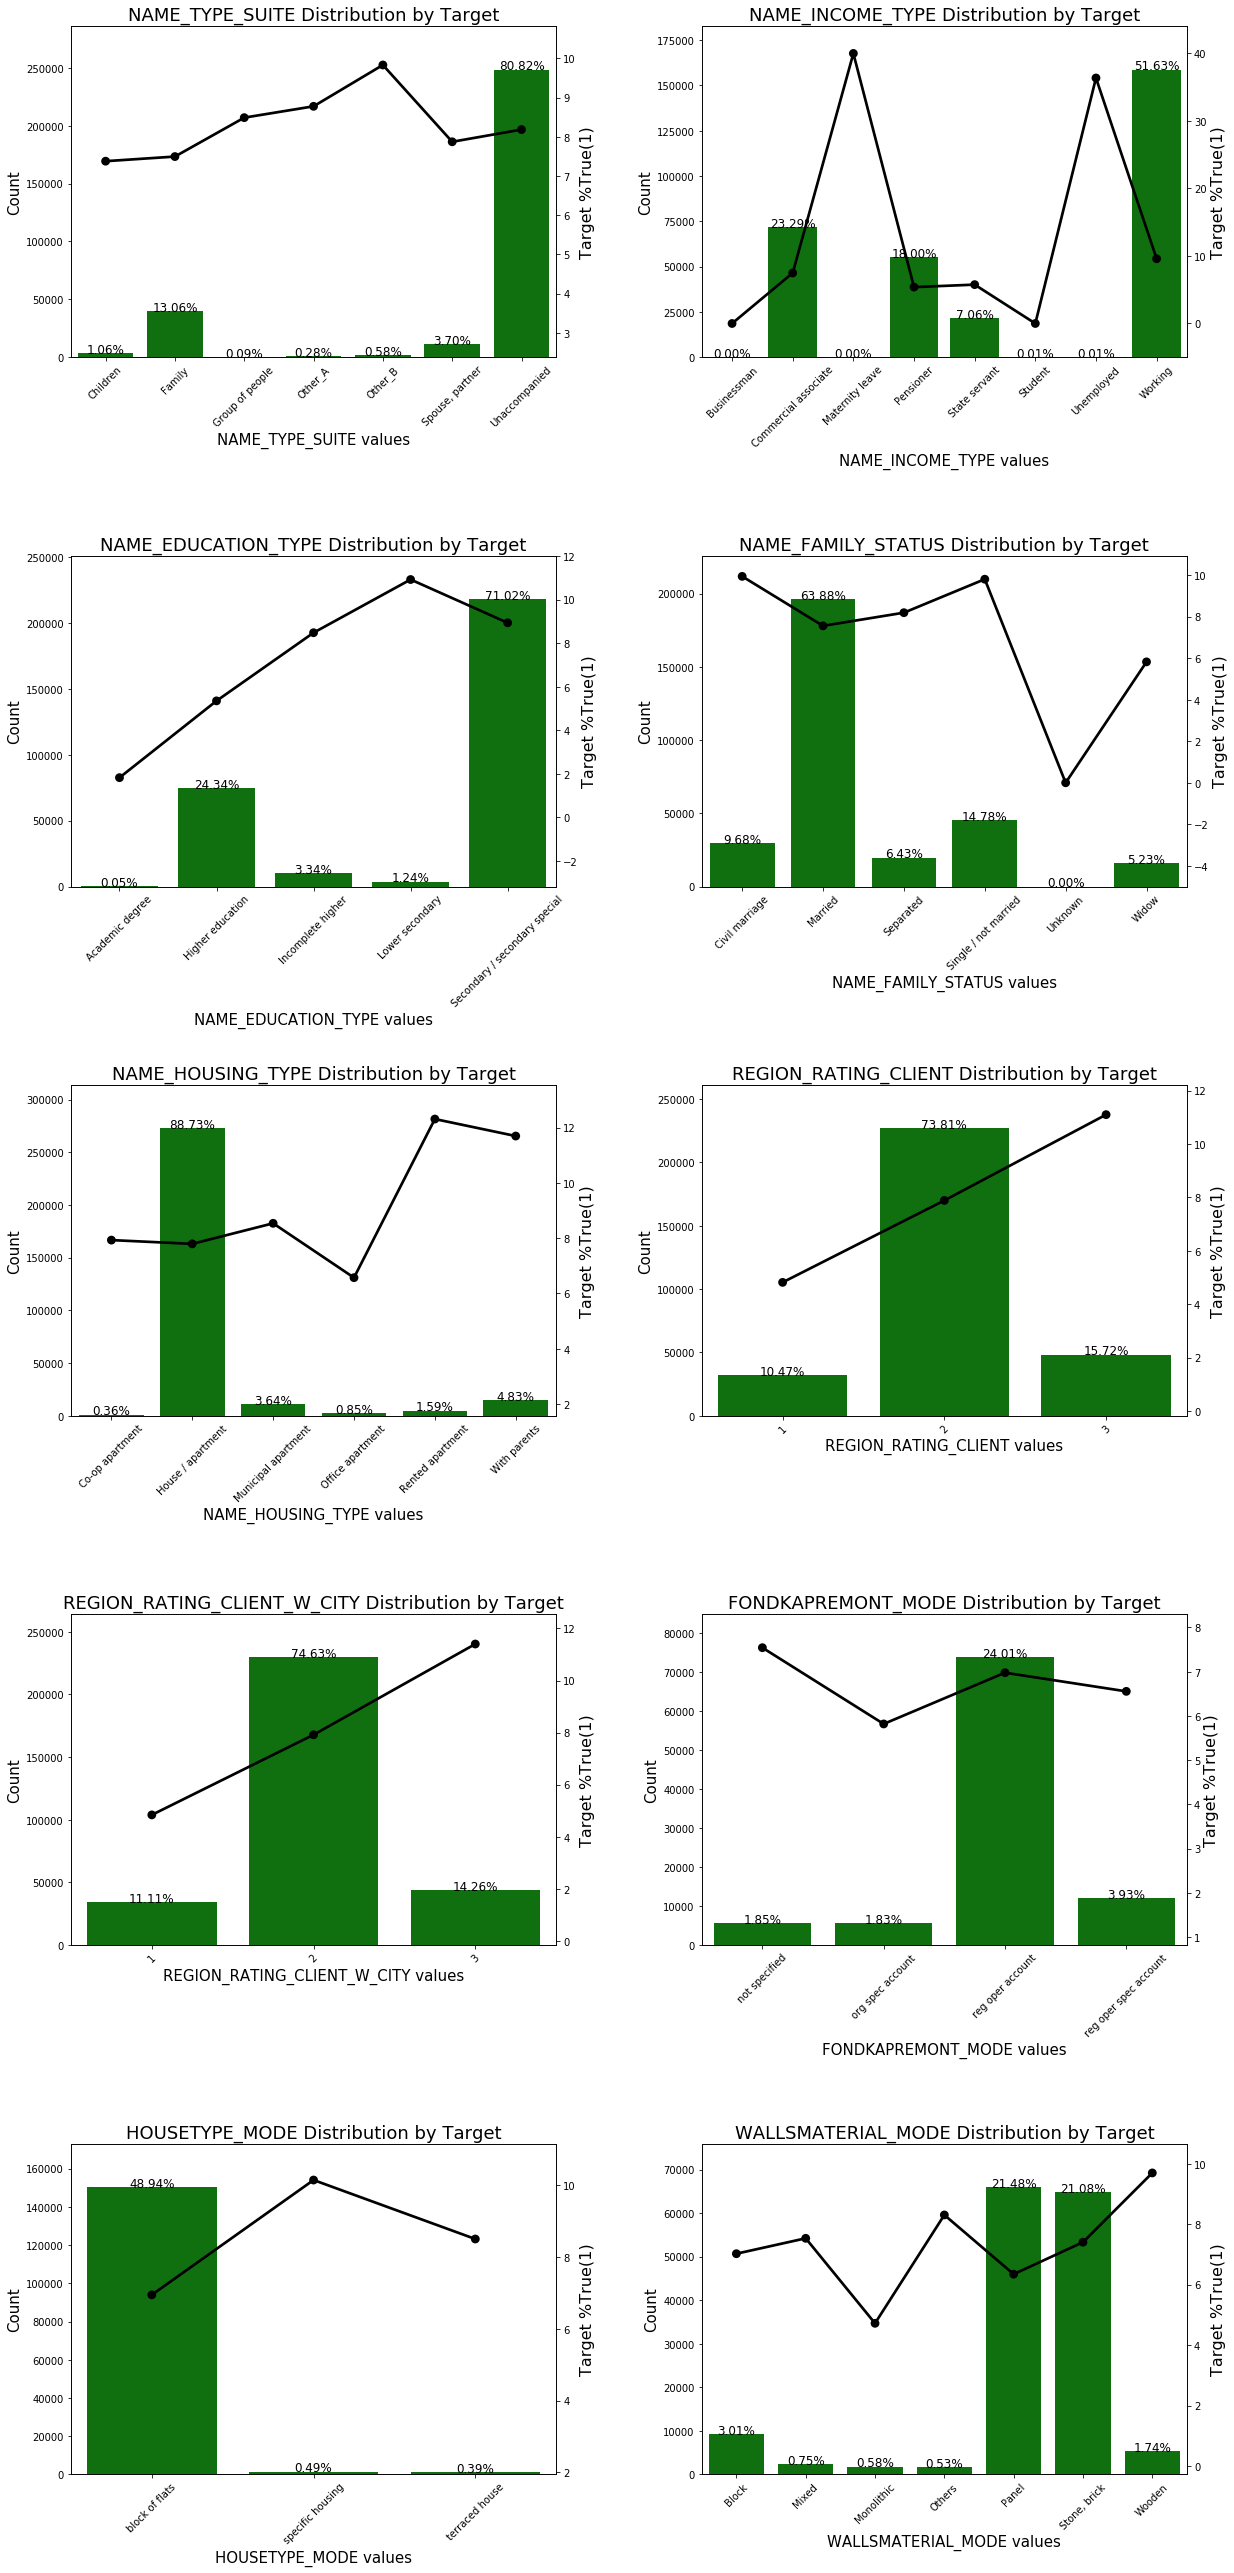

In [92]:
ploting_cat_fet(train, list(binary_removed.keys()), vis_row=5, vis_col=2)

# High cardinality

In [94]:
high_cardinality = {k: v for k, v in nominal.items() if v[0] >= 8  }

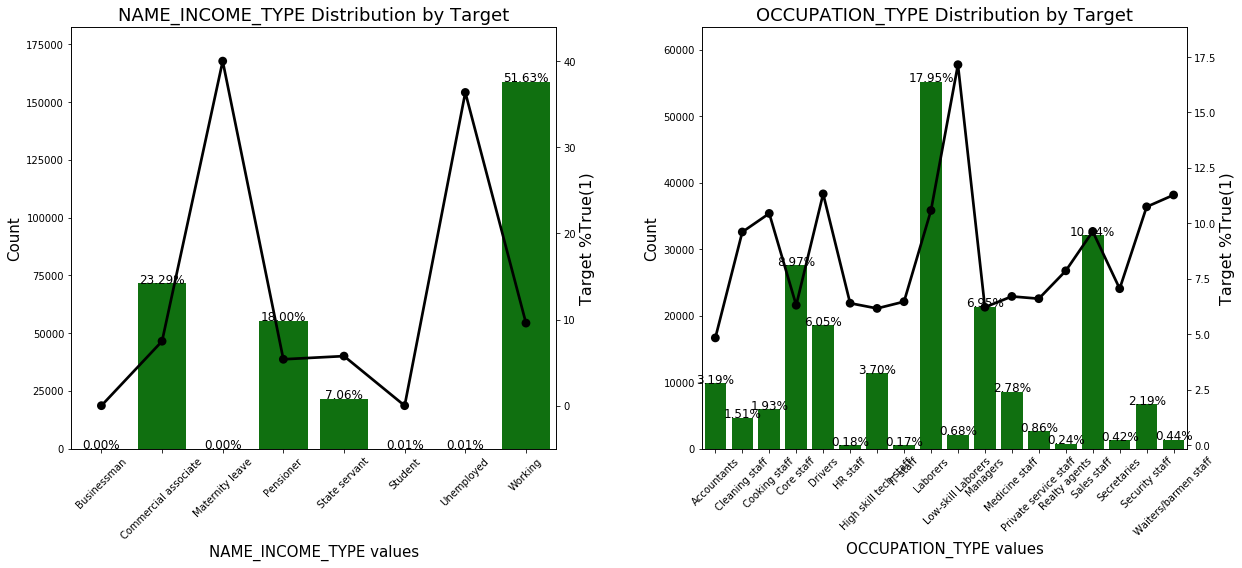

In [98]:
ploting_cat_fet(train, list(high_cardinality.keys()), vis_row=4, vis_col=2)

EMERGENCYSTATE_MODE is binary feature

In [99]:
from pandas.api.types import CategoricalDtype 


In [ ]:
%%time
traintest = pd.concat([train, test])
#pd.get_dummies(traintest, columns=traintest.columns, drop_first=True, sparse=True)

In [ ]:
traintest

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=traintest.columns)

In [ ]:
encoder.fit(traintest)